In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [3]:
import matplotlib.pyplot as plt
import numpy as np

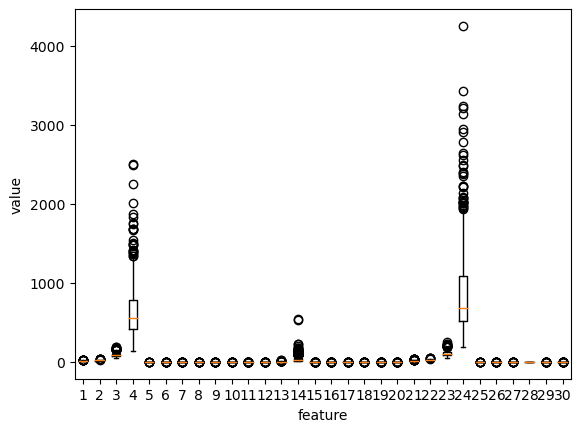

In [4]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [5]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [6]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [7]:
x = cancer.data
y = cancer.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.2, random_state=42)
print(x_train.shape,x_test.shape)

(455, 30) (114, 30)


In [10]:
class LogisticNeuron:

    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self,x,err):
        w_grad = x*err
        b_grad = 1*err
        return w_grad, b_grad

    def fit(self,x,y,epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i-a)
                w_grad , b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad

    def activation(self,z):
        a = 1 / (1+np.exp(-z))
        return a

    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a>0.5

In [11]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

/var/folders/wc/tkj8z9k12870cwdmxpbww4q80000gn/T/ipykernel_2101/4146290455.py:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1+np.exp(-z))


In [12]:
np.mean(neuron.predict(x_test) == y_test)


/var/folders/wc/tkj8z9k12870cwdmxpbww4q80000gn/T/ipykernel_2101/4146290455.py:29: RuntimeWarning: overflow encountered in exp
  a = 1 / (1+np.exp(-z))


0.8245614035087719

In [13]:
class SingleLayer:

    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self,x):
        z = np.sum(x*self.w) + self.b
        return z

    def backprop(self,x,err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self,z):
        z = np.clip(z,-100,None)
        a = 1 / (1+np.exp(-z))
        return a

    def fit(self,x,y,epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = -(y[i]-a)
                w_grad, b_grad = self.backprop(x[i],err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a,1e-10, 1-1e-10)

                loss += -(y[i]*np.log(a)+(1-y[i]*np.log(1-a)))
            self.losses.append(loss/len(y))

    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z)>0

    def score(self,x,y):
        return np.mean(self.predict(x)==y)

In [14]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.8859649122807017

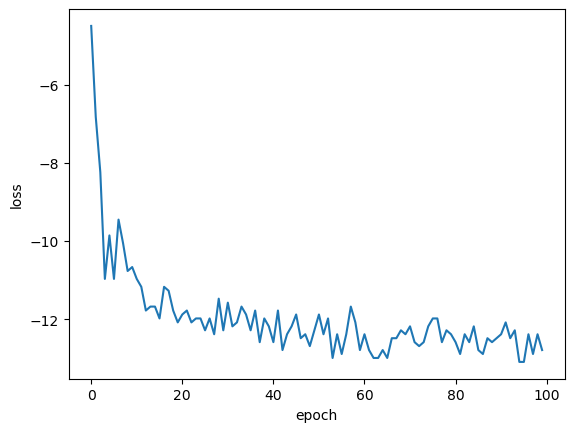

In [15]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'log', max_iter=100, tol = 1e-3, random_state=42)

In [17]:
sgd.fit(x_train, y_train)
sgd.score(x_test,y_test)

/Users/chaseungjun/anaconda3/envs/ML_Practice/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


0.8333333333333334

In [ ]:
sgd.predict(x_test[0:10])
